In [1]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


In [3]:
# size = tlp.ProgressParallel(n_jobs=network_count, total=network_count)(
#   joblib.delayed(get_size)(network_index) for network_index in network_indices
# )
  
# size = pd.DataFrame(size)
size = joblib.load('code/figures/size.pkl')

In [4]:
networks = get_networks()

In [5]:
category_name = 'Domain'

df = pd.concat([size, networks], axis=1)
df.rename(columns={'category': category_name}, inplace=True)
df.replace({category_name: {'social': 'Social', 'information': 'Information', 'technological': 'Technological'}}, inplace=True)

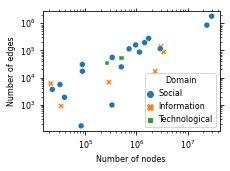

In [9]:
fontsize=8
rc = {
  'xtick.top': True, 'ytick.right': True, 'figure.figsize': (3.30,2.475), 
  'axes.titlesize': fontsize, 
  'axes.labelsize': fontsize, 
  'xtick.labelsize': fontsize, 
  'ytick.labelsize': fontsize, 
  'legend.fontsize': fontsize, 
  'legend.title_fontsize': fontsize,
  'lines.linewidth': 2,
#   'lines.markersize': 4,
  'legend.handlelength': .4,
  'font.family': 'sans-serif',
  'font.sans-serif': 'Helvetica',
  'savefig.transparent': True
}

with plt.rc_context(rc):
  sns.scatterplot(data=df, x='edges', y='nodes', hue=category_name, 
                  style=category_name)
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('Number of nodes')
  plt.ylabel('Number of edges')
  plt.legend(loc='lower right', title=category_name)
  plt.tight_layout()
  plt.savefig('code/figures/output/Fig2.pdf')